In [1]:
#import dataset
from sklearn.datasets import load_wine
data = load_wine()
dados = data.data
feature_names = data.feature_names
y = data.target
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
#imports para treinamento
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
wine_df = pd.DataFrame(dados)
wine_df.columns = feature_names
wine_df = wine_df.join(pd.Series(y, name='target'))
feature_names.append('target')
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [4]:
wine_df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


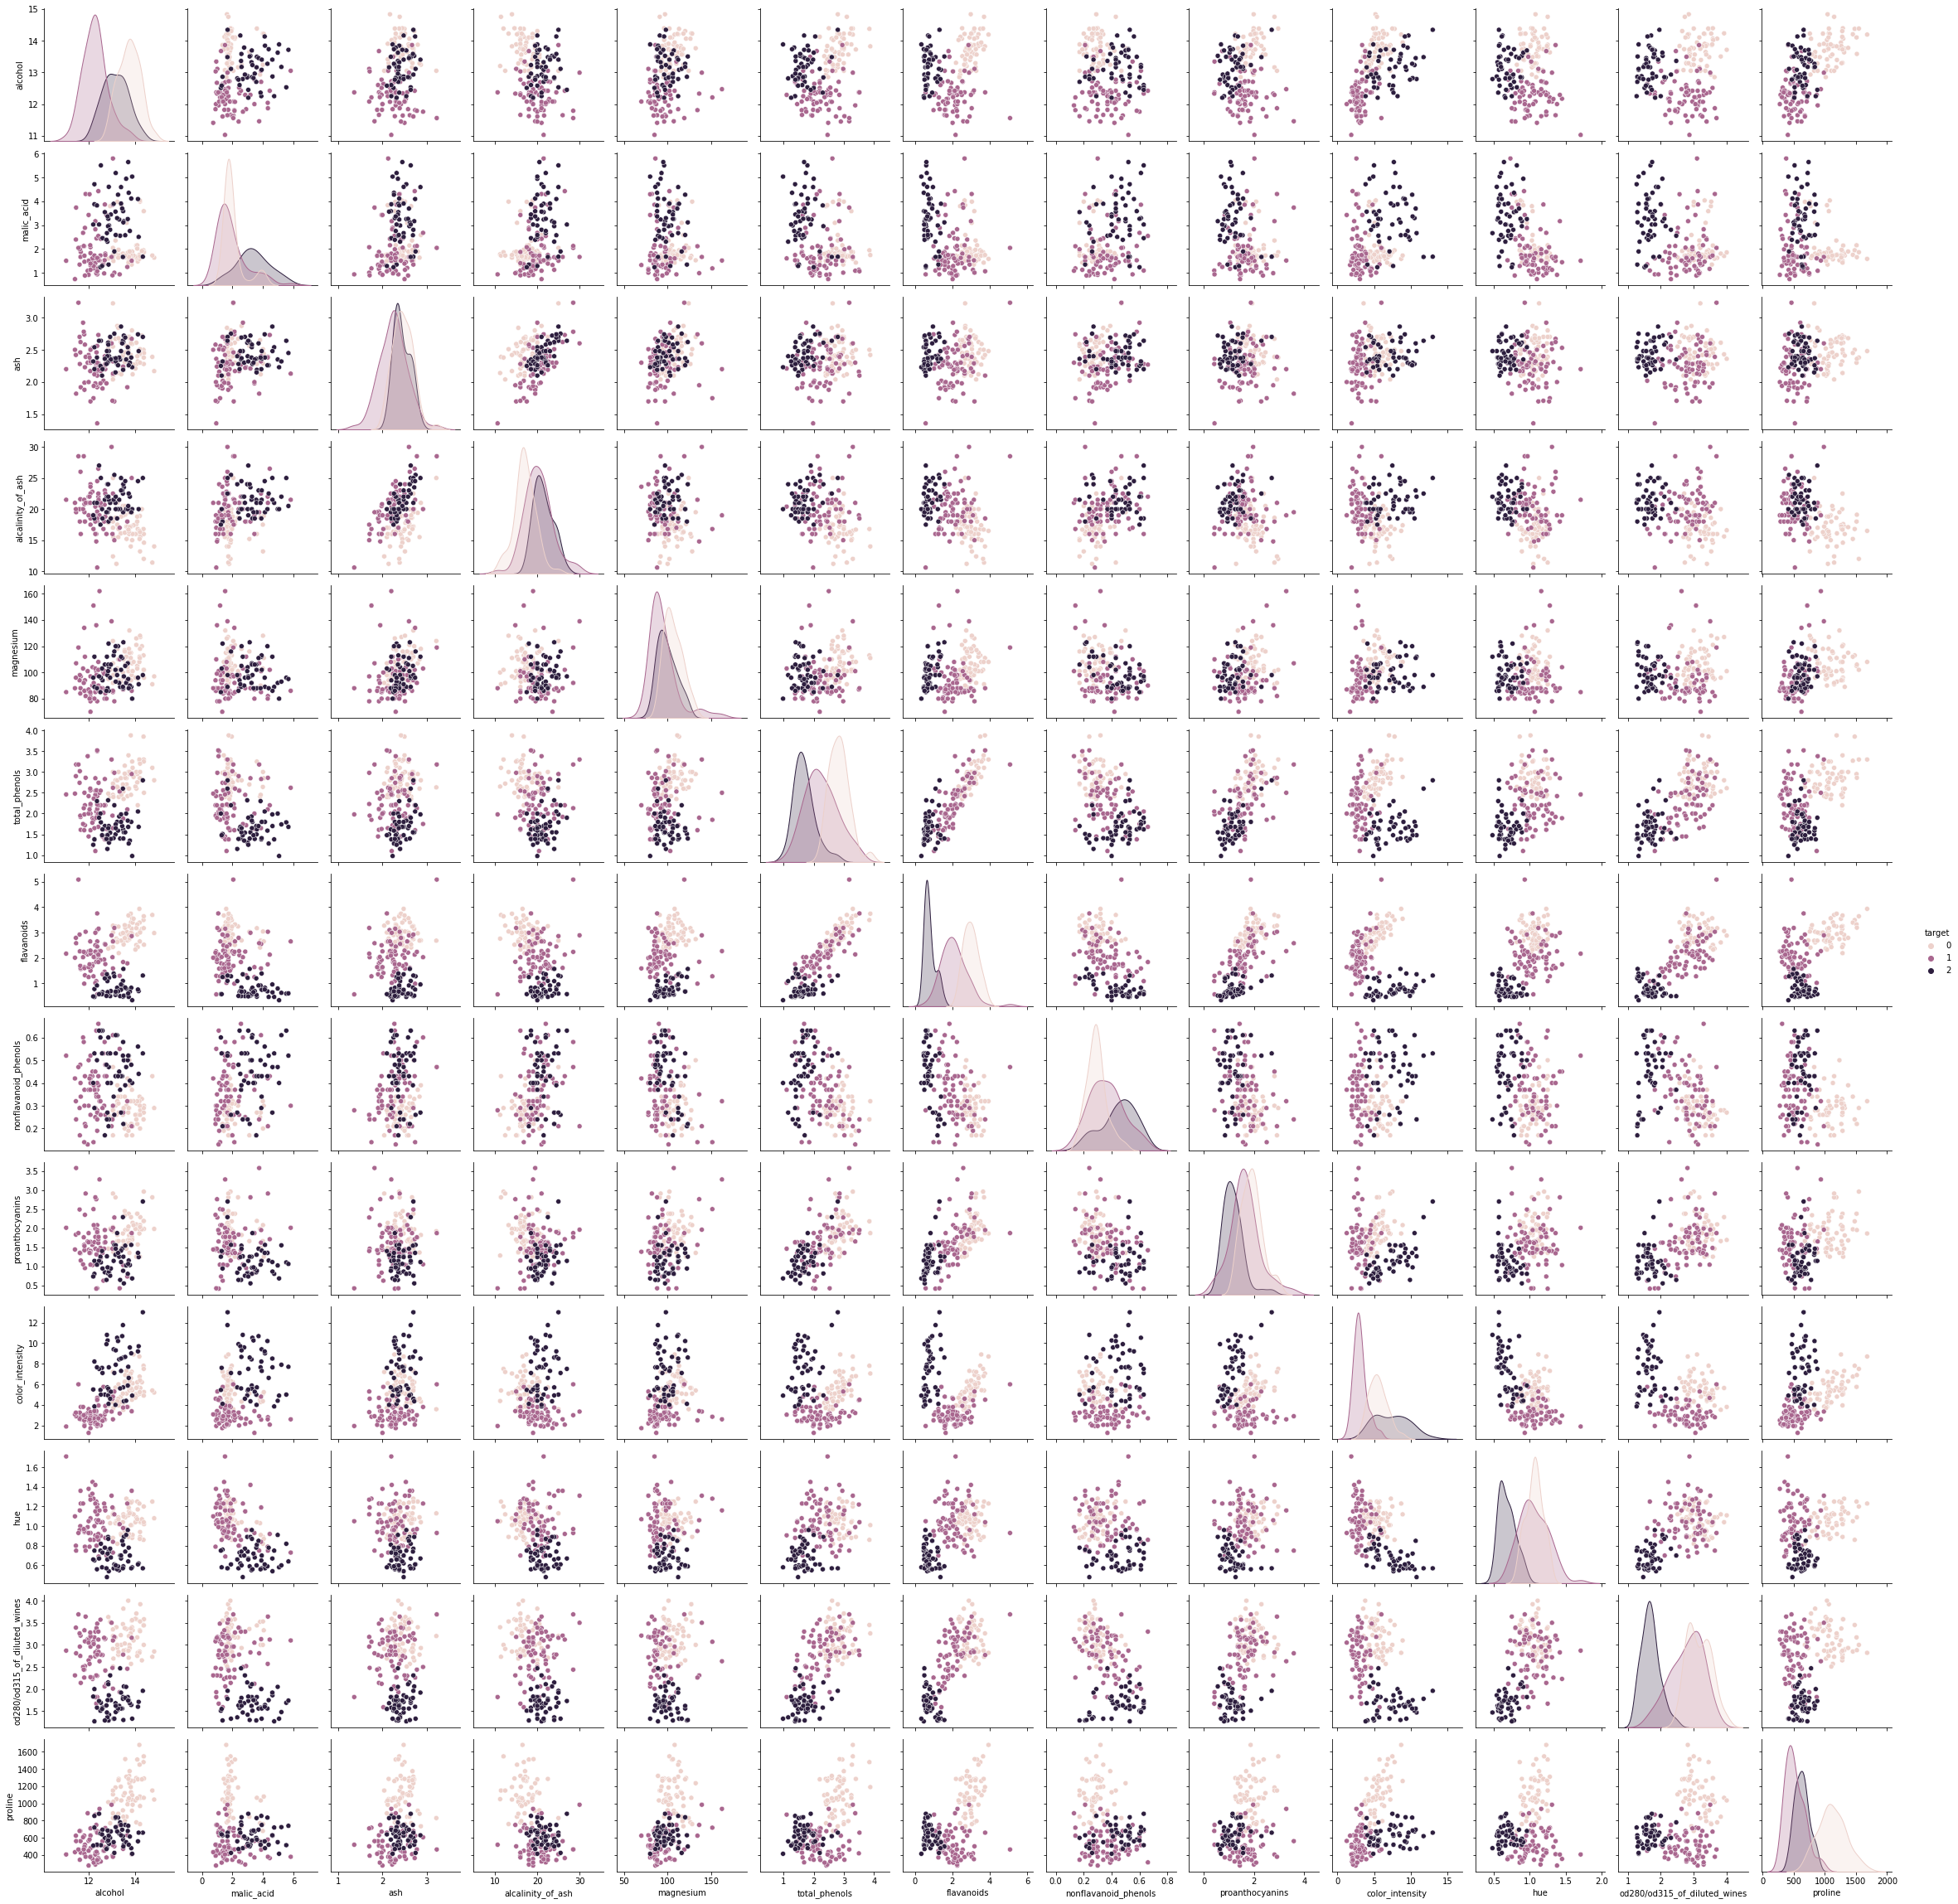

In [5]:
sns.pairplot(wine_df,hue='target')

In [6]:
#remover outliers
from scipy import stats
wine_df = wine_df[(np.abs(stats.zscore(wine_df)) < 3).all(axis=1)]
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,13.033214,2.343571,2.369226,19.361310,98.779762,2.273988,2.010298,0.362679,1.553155,5.116726,0.951226,2.596607,752.875000,0.934524
std,0.793084,1.097823,0.243202,3.118708,12.560477,0.627890,0.985189,0.123940,0.529569,2.243267,0.220522,0.714607,319.272211,0.790209
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.370000,1.610000,2.230000,17.175000,88.000000,1.700000,1.097500,0.270000,1.235000,3.292500,0.787500,1.905000,501.500000,0.000000
50%,13.060000,1.870000,2.360000,19.250000,97.500000,2.265000,2.100000,0.340000,1.505000,4.850000,0.960000,2.775000,675.000000,1.000000
75%,13.695000,3.105000,2.542500,21.500000,106.250000,2.800000,2.885000,0.430000,1.870000,6.262500,1.112500,3.170000,1016.250000,2.000000
max,14.830000,5.650000,2.920000,28.500000,136.000000,3.880000,3.930000,0.660000,2.960000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [7]:
#normalizar dados usando MinMaxScaler
y = wine_df.target
scaler = MinMaxScaler()
scaler.fit(wine_df)
print(scaler.data_max_)
wine_df_normalized = scaler.transform(wine_df)
wine_df_normalized = pd.DataFrame(wine_df_normalized)
wine_df_normalized.columns = feature_names
print(wine_df_normalized.tail())

[1.483e+01 5.650e+00 2.920e+00 2.850e+01 1.360e+02 3.880e+00 3.930e+00
 6.600e-01 2.960e+00 1.175e+01 1.450e+00 4.000e+00 1.680e+03 2.000e+00]
      alcohol  malic_acid  ...   proline  target
163  0.672515    1.000000  ...  0.329529     1.0
164  0.581871    0.645621  ...  0.336662     1.0
165  0.543860    0.720978  ...  0.397290     1.0
166  0.514620    0.376782  ...  0.400856     1.0
167  0.795322    0.684318  ...  0.201141     1.0

[5 rows x 14 columns]


In [8]:
#balancear classes
wine_df_normalized.target = y
df_class0 = wine_df_normalized[wine_df_normalized.target == 0]
df_class1 = wine_df_normalized[wine_df_normalized.target== 1]
df_class2 = wine_df_normalized[wine_df_normalized.target== 2]
print(df_class0.shape)
print(df_class1.shape)
print(df_class2.shape)

(58, 14)
(63, 14)
(37, 14)


In [9]:
#downsample
from sklearn.utils import resample
df_class0 = resample(df_class0,replace=False,n_samples=37)
df_class1 = resample(df_class1,replace=False,n_samples=37)
wine_df_normalized = pd.concat([df_class0, df_class1, df_class2])

In [10]:
#remover coluna de resultados para iniciar treinamentos
y = wine_df_normalized.target
wine_df_normalized = wine_df_normalized.drop(['target'], axis=1)
wine_df_normalized

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
11,0.792398,0.150713,0.508197,0.323699,0.378788,0.420690,0.582173,0.245283,0.454902,0.355301,0.711340,0.567766,0.714693
39,0.628655,0.197556,0.500000,0.289017,0.712121,0.748276,0.821727,0.396226,0.756863,0.463228,0.484536,0.772894,0.368759
29,0.678363,0.154786,0.819672,0.653179,0.469697,0.696552,0.810585,0.301887,0.772549,0.422159,0.731959,0.527473,0.718260
58,0.269006,0.073320,0.475410,0.277457,0.469697,0.368966,0.208914,0.943396,0.000000,0.190067,0.793814,0.146520,0.286733
19,0.652047,0.480652,0.704918,0.231214,0.696970,0.593103,0.749304,0.075472,0.490196,0.364852,0.494845,0.765568,0.404422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.672515,1.000000,0.614754,0.537572,0.378788,0.241379,0.075209,0.735849,0.254902,0.613181,0.164948,0.172161,0.329529
164,0.581871,0.645621,0.639344,0.682081,0.484848,0.282759,0.114206,0.566038,0.392157,0.574976,0.226804,0.106227,0.336662
165,0.543860,0.720978,0.459016,0.508671,0.757576,0.210345,0.097493,0.566038,0.368627,0.851958,0.113402,0.106227,0.397290
166,0.514620,0.376782,0.549180,0.508671,0.757576,0.231034,0.094708,0.754717,0.411765,0.765998,0.123711,0.128205,0.400856


In [11]:
#separar dados em treino, teste e validação (70% treino,15% teste e 15% validação)
X_train, X_test, y_train, y_test = train_test_split(wine_df_normalized, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [12]:
#KNN
knnClassifiers = []
knnTestScores = []
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i,)
  knn.fit(X_train,y_train)
  knnClassifiers.append(knn)
  print("Score usando {} vizinhos: {}".format(i,knn.score(X_test,y_test)))
  knnTestScores.append(knn.score(X_test,y_test))

Score usando 1 vizinhos: 1.0
Score usando 2 vizinhos: 0.8823529411764706
Score usando 3 vizinhos: 1.0
Score usando 4 vizinhos: 1.0
Score usando 5 vizinhos: 1.0
Score usando 6 vizinhos: 1.0
Score usando 7 vizinhos: 1.0
Score usando 8 vizinhos: 1.0
Score usando 9 vizinhos: 1.0
Score usando 10 vizinhos: 1.0


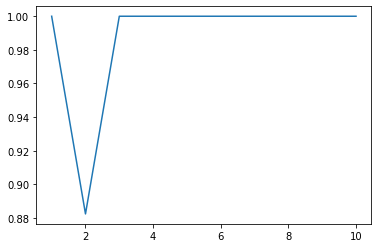

In [13]:
plt.plot(range(1,11),knnTestScores)

In [14]:
#KNN com KDTree
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')
  knn.fit(X_train,y_train)
  knnClassifiers.append(knn)
  print("Score usando {} vizinhos: {}".format(i,knn.score(X_test,y_test)))
  knnTestScores.append(knn.score(X_test,y_test))

Score usando 1 vizinhos: 1.0
Score usando 2 vizinhos: 0.8823529411764706
Score usando 3 vizinhos: 1.0
Score usando 4 vizinhos: 1.0
Score usando 5 vizinhos: 1.0
Score usando 6 vizinhos: 1.0
Score usando 7 vizinhos: 1.0
Score usando 8 vizinhos: 1.0
Score usando 9 vizinhos: 1.0
Score usando 10 vizinhos: 1.0


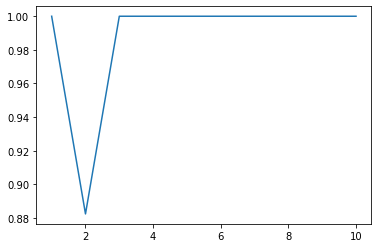

In [15]:
plt.plot(range(1,11),knnTestScores[10:20])

In [16]:
#KNN com KDTree e weights = 'distance'
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree',weights='distance')
  knn.fit(X_train,y_train)
  knnClassifiers.append(knn)
  print("Score usando {} vizinhos: {}".format(i,knn.score(X_test,y_test)))
  knnTestScores.append(knn.score(X_test,y_test))

Score usando 1 vizinhos: 1.0
Score usando 2 vizinhos: 1.0
Score usando 3 vizinhos: 1.0
Score usando 4 vizinhos: 1.0
Score usando 5 vizinhos: 1.0
Score usando 6 vizinhos: 1.0
Score usando 7 vizinhos: 1.0
Score usando 8 vizinhos: 1.0
Score usando 9 vizinhos: 1.0
Score usando 10 vizinhos: 1.0


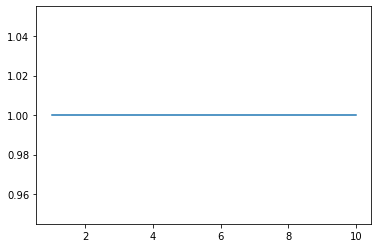

In [17]:
plt.plot(range(1,11),knnTestScores[20:30])

In [18]:
#KNN com brute force e weights = 'distance'
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute',weights='distance')
  knn.fit(X_train,y_train)
  knnClassifiers.append(knn)
  print("Score usando {} vizinhos: {}".format(i,knn.score(X_test,y_test)))
  knnTestScores.append(knn.score(X_test,y_test))

Score usando 1 vizinhos: 1.0
Score usando 2 vizinhos: 1.0
Score usando 3 vizinhos: 1.0
Score usando 4 vizinhos: 1.0
Score usando 5 vizinhos: 1.0
Score usando 6 vizinhos: 1.0
Score usando 7 vizinhos: 1.0
Score usando 8 vizinhos: 1.0
Score usando 9 vizinhos: 1.0
Score usando 10 vizinhos: 1.0


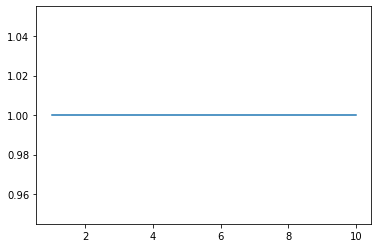

In [19]:
plt.plot(range(1,11),knnTestScores[30:40])

In [20]:
## MLP ##

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

mlpClassifiers = []
mlpTestScores = []
#activation identity
mlp = MLPClassifier(random_state=1, max_iter=2000,hidden_layer_sizes=(3, ), activation='identity').fit(X_train, y_train)
mlp_score = mlp.score(X_test,y_test)
print("Score com ativação identity: {}".format(mlp_score))
mlpClassifiers.append(mlp)
mlpTestScores.append(mlp_score)
#activation logistic
mlp = MLPClassifier(random_state=1, max_iter=2000,hidden_layer_sizes=(3, ), activation='logistic').fit(X_train, y_train)
mlp_score = mlp.score(X_test,y_test)
print("Score com ativação logistic: {}".format(mlp_score))
mlpClassifiers.append(mlp)
mlpTestScores.append(mlp_score)
#activation tanh
mlp = MLPClassifier(random_state=1, max_iter=2000,hidden_layer_sizes=(3, ), activation='tanh').fit(X_train, y_train)
mlp_score = mlp.score(X_test,y_test)
print("Score com ativação tanh: {}".format(mlp_score))
mlpClassifiers.append(mlp)
mlpTestScores.append(mlp_score)
#activation relu
mlp = MLPClassifier(random_state=1, max_iter=2000,hidden_layer_sizes=(3, ), activation='relu').fit(X_train, y_train)
mlp_score = mlp.score(X_test,y_test)
print("Score com ativação relu: {}".format(mlp_score))
mlpClassifiers.append(mlp)
mlpTestScores.append(mlp_score)


Score com ativação identity: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score com ativação logistic: 1.0
Score com ativação tanh: 1.0
Score com ativação relu: 1.0


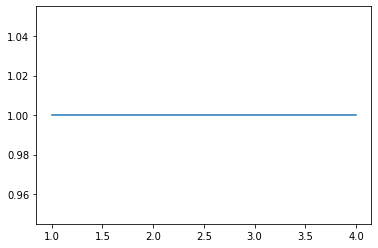

In [21]:
plt.plot(range(1,5),mlpTestScores)

In [22]:
#activation relu alterando lr inicial
for i in [0.001,0.002,0.003,0.01,0.015,0.05,0.1]:
  mlp = MLPClassifier(random_state=1, max_iter=2000,hidden_layer_sizes=(3, ), activation='relu',learning_rate_init=i).fit(X_train, y_train)
  mlp_score = mlp.score(X_test,y_test)
  print("Score com ativação relu e learning rate {}: {}".format(i,mlp_score))
  mlpClassifiers.append(mlp)
  mlpTestScores.append(mlp_score)

Score com ativação relu e learning rate 0.001: 1.0
Score com ativação relu e learning rate 0.002: 1.0
Score com ativação relu e learning rate 0.003: 1.0
Score com ativação relu e learning rate 0.01: 1.0
Score com ativação relu e learning rate 0.015: 1.0
Score com ativação relu e learning rate 0.05: 1.0
Score com ativação relu e learning rate 0.1: 1.0


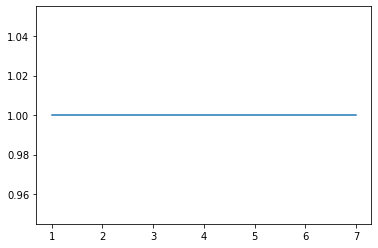

In [23]:
plt.plot(range(1,8),mlpTestScores[4:11])

In [24]:
#activation relu com alteração no max_iter
for i in [200,300,400,500,1000,2000,3000]:
  mlp = MLPClassifier(random_state=1, max_iter=i,hidden_layer_sizes=(3, ), activation='relu',learning_rate_init=0.001).fit(X_train, y_train)
  mlp_score = mlp.score(X_test,y_test)
  print("Score com ativação relu e max_iter {}: {}".format(i,mlp_score))
  mlpClassifiers.append(mlp)
  mlpTestScores.append(mlp_score)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score com ativação relu e max_iter 200: 0.5882352941176471
Score com ativação relu e max_iter 300: 0.5882352941176471


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score com ativação relu e max_iter 400: 0.8235294117647058


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score com ativação relu e max_iter 500: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score com ativação relu e max_iter 1000: 1.0
Score com ativação relu e max_iter 2000: 1.0
Score com ativação relu e max_iter 3000: 1.0


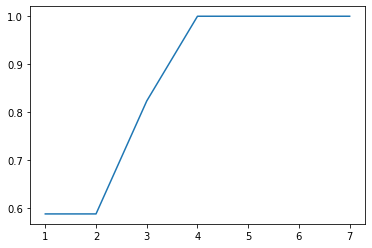

In [25]:
plt.plot(range(1,8),mlpTestScores[11:18])

In [26]:
#modelo anterior com solvers sgd e lbfgs
mlp = MLPClassifier(random_state=1, max_iter=200,hidden_layer_sizes=(3, ), activation='relu',learning_rate_init=0.05,solver='sgd').fit(X_train, y_train)
mlp_score = mlp.score(X_test,y_test)
print("Score: {}".format(mlp_score))
mlpClassifiers.append(mlp)
mlpTestScores.append(mlp_score)
mlp = MLPClassifier(random_state=1, max_iter=200,hidden_layer_sizes=(3, ), activation='relu',learning_rate_init=0.05,solver='lbfgs').fit(X_train, y_train)
mlp_score = mlp.score(X_test,y_test)
print("Score: {}".format(mlp_score))
mlpClassifiers.append(mlp)
mlpTestScores.append(mlp_score)

Score: 1.0
Score: 0.8823529411764706


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


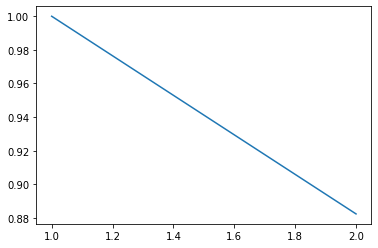

In [27]:
plt.plot(range(1,3),mlpTestScores[18:20])

In [28]:
#Seleção dos melhores modelos KNN e MLP para validação final

#KNN usando 1 e 2 vizinhos próximos
knn = knnClassifiers[4]
print("Score KNN com 5 vizinhos próximos: {}".format(knn.score(X_val,y_val)))
#MLP com activation relu, lr 0.001, solver adam, max_iter 500
mlp = mlpClassifiers[15]
print("Score MLP com activation relu, lr 0.05, solver adam, max_iter 200: {}".format(mlp.score(X_val,y_val)))

Score KNN com 5 vizinhos próximos: 0.9411764705882353
Score MLP com activation relu, lr 0.05, solver adam, max_iter 200: 0.9411764705882353


In [29]:
# Média e o desvio padrão dos valores de acurácia obtidos com os conjuntos de teste.
print("Média classificadores KNN: {}".format(np.mean(knnTestScores)))
print("Desvio padrão classificadores KNN: {}".format(np.std(knnTestScores)))
print("Média classificadores MLP: {}".format(np.mean(mlpTestScores)))
print("Desvio padrão classificadores MLP: {}".format(np.std(mlpTestScores)))

Média classificadores KNN: 0.9941176470588236
Desvio padrão classificadores KNN: 0.025640582020827495
Média classificadores MLP: 0.9441176470588235
Desvio padrão classificadores MLP: 0.12681212433711822
